Getting datasets list: 100%|██████████| 214/214 [00:00<00:00, 412.51it/s]
!!! Wrong query or api.insee.fr error !!!
1/1 - Getting series: 100%|██████████| 2/2 [00:06<00:00,  3.31s/it]
Data has been cached



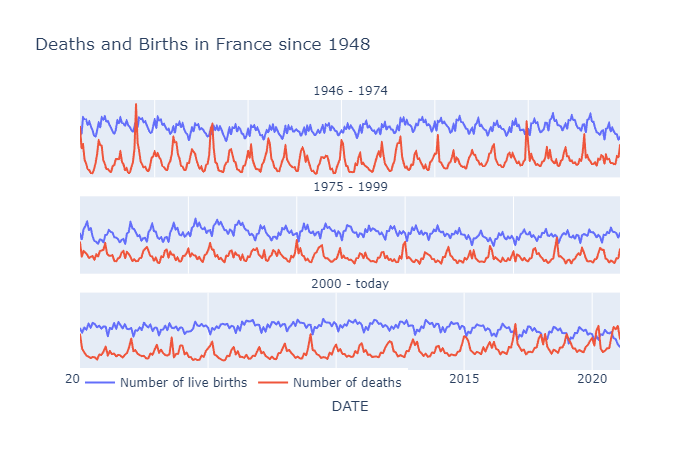

In [1]:
from pynsee.macro import *
import numpy as np

import plotly.express as px
from plotly.offline import plot
import os 
# Beware : any change to the keys should be tested in a new python session
#os.environ['insee_key'] = "my_insee_key"
#os.environ['insee_secret'] = "my_insee_secret"

insee_data = get_dataset_list()

df_idbank = get_idbank_list("DECES-MORTALITE", "NAISSANCES-FECONDITE")

df_idbank = df_idbank.loc[(df_idbank.FREQ == "M") & # monthly
                          (df_idbank.REF_AREA == "FM") & # metropolitan France
                          (df_idbank.DEMOGRAPHIE.isin(["NAISS","DECES"]))] 

# get data
data = get_insee_idbank(df_idbank.idbank)

data = split_title(data)

data['period'] = np.select([(data.index < '1975-01-01'),
                            (data.index >= '1975-01-01') & (data.index < '2000-01-01'),
                            (data.index >= '2000-01-01')],
                            ['1946 - 1974', '1975 - 1999', '2000 - today'])


fig = px.line(data, x = data.index, y = "OBS_VALUE", color = "TITLE_EN2",
             facet_col = "period", facet_col_wrap = 1,
             title="Deaths and Births in France since 1948")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(matches=None)
fig.update_yaxes(visible=False)
fig.update_layout(
   legend_title_text = '',
   legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="left",
    x=0
))
fig.show("png")

